In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [2]:
import pandas as pd
import os
import yfinance as yf
from sklearn.metrics import mean_absolute_error
Stock = "MS"
if os.path.exists(Stock + ".csv"):
    df = pd.read_csv(Stock + ".csv", index_col=0)
else:
    df = yf.Ticker(Stock)
    df = df.history(period="max")
    df.to_csv(Stock + ".csv")
df = pd.read_csv(Stock + '.csv')

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1993-02-23 00:00:00-05:00,3.705273,3.763168,3.546062,3.589483,40594800,0.0,0.0
1,1993-02-24 00:00:00-05:00,3.647378,3.734220,3.603957,3.690799,9426400,0.0,0.0
2,1993-02-25 00:00:00-05:00,3.705273,3.777642,3.690800,3.777642,5229200,0.0,0.0
3,1993-02-26 00:00:00-05:00,3.777644,3.835539,3.719749,3.835539,2761200,0.0,0.0
4,1993-03-01 00:00:00-05:00,3.792117,3.806591,3.705275,3.705275,3014400,0.0,0.0
...,...,...,...,...,...,...,...,...
7939,2024-09-04 00:00:00-04:00,99.739998,101.320000,99.680000,100.150002,4212500,0.0,0.0
7940,2024-09-05 00:00:00-04:00,101.000000,101.300003,99.120003,99.559998,4462400,0.0,0.0
7941,2024-09-06 00:00:00-04:00,99.699997,100.800003,96.139999,96.589996,9246800,0.0,0.0
7942,2024-09-09 00:00:00-04:00,97.760002,99.019997,97.599998,98.180000,5278900,0.0,0.0


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1993-02-23 00:00:00-05:00,3.589483
1,1993-02-24 00:00:00-05:00,3.690799
2,1993-02-25 00:00:00-05:00,3.777642
3,1993-02-26 00:00:00-05:00,3.835539
4,1993-03-01 00:00:00-05:00,3.705275
...,...,...
7939,2024-09-04 00:00:00-04:00,100.150002
7940,2024-09-05 00:00:00-04:00,99.559998
7941,2024-09-06 00:00:00-04:00,96.589996
7942,2024-09-09 00:00:00-04:00,98.180000


In [4]:
df['Date']

0       1993-02-23 00:00:00-05:00
1       1993-02-24 00:00:00-05:00
2       1993-02-25 00:00:00-05:00
3       1993-02-26 00:00:00-05:00
4       1993-03-01 00:00:00-05:00
                  ...            
7939    2024-09-04 00:00:00-04:00
7940    2024-09-05 00:00:00-04:00
7941    2024-09-06 00:00:00-04:00
7942    2024-09-09 00:00:00-04:00
7943    2024-09-10 00:00:00-04:00
Name: Date, Length: 7944, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  split2 = split[2].split(' ')
  year, month, day = int(split[0]), int(split[1]), int(split2[0])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2024-09-09')
datetime_object
time_path = 10

In [6]:
df

,Date,Close
0,1993-02-23 00:00:00-05:00,3.589483
1,1993-02-24 00:00:00-05:00,3.690799
2,1993-02-25 00:00:00-05:00,3.777642
3,1993-02-26 00:00:00-05:00,3.835539
4,1993-03-01 00:00:00-05:00,3.705275
...,...,...
7939,2024-09-04 00:00:00-04:00,100.150002
7940,2024-09-05 00:00:00-04:00,99.559998
7941,2024-09-06 00:00:00-04:00,96.589996
7942,2024-09-09 00:00:00-04:00,98.180000


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\guera\AppData\Local\Temp\ipykernel_6068\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1993-02-23
1      1993-02-24
2      1993-02-25
3      1993-02-26
4      1993-03-01
          ...    
7939   2024-09-04
7940   2024-09-05
7941   2024-09-06
7942   2024-09-09
7943   2024-09-10
Name: Date, Length: 7944, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1993-02-23,3.589483
1993-02-24,3.690799
1993-02-25,3.777642
1993-02-26,3.835539
1993-03-01,3.705275
...,...
2024-09-04,100.150002
2024-09-05,99.559998
2024-09-06,96.589996


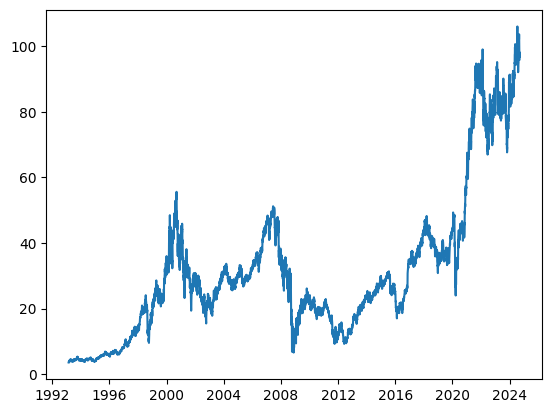

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2010-01-04',
                                '2024-09-09',
                                n=time_path)
windowed_df


# j-5 j-4 j-3 j-2 j-1 j

,Target Date,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2010-01-04,21.341019,21.406971,21.736769,21.692781,21.553547,21.692781,21.465611,21.568207,21.612179,21.692781,22.652842
1,2010-01-05,21.406971,21.736769,21.692781,21.553547,21.692781,21.465611,21.568207,21.612179,21.692781,22.652842,23.480982
2,2010-01-06,21.736769,21.692781,21.553547,21.692781,21.465611,21.568207,21.612179,21.692781,22.652842,23.480982,23.781448
3,2010-01-07,21.692781,21.553547,21.692781,21.465611,21.568207,21.612179,21.692781,22.652842,23.480982,23.781448,24.125910
4,2010-01-08,21.553547,21.692781,21.465611,21.568207,21.612179,21.692781,22.652842,23.480982,23.781448,24.125910,23.634878
...,...,...,...,...,...,...,...,...,...,...,...,...
3690,2024-09-03,101.750000,100.779999,100.690002,100.559998,101.889999,102.330002,102.080002,102.199997,102.599998,103.610001,99.269997
3691,2024-09-04,100.779999,100.690002,100.559998,101.889999,102.330002,102.080002,102.199997,102.599998,103.610001,99.269997,100.150002
3692,2024-09-05,100.690002,100.559998,101.889999,102.330002,102.080002,102.199997,102.599998,103.610001,99.269997,100.150002,99.559998
3693,2024-09-06,100.559998,101.889999,102.330002,102.080002,102.199997,102.599998,103.610001,99.269997,100.150002,99.559998,96.589996


<!-- Basicelly we do this : [Target-3, Target-2, Target-1] --> [Target]

In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((3695,), (3695, 10, 1), (3695,))

[[[ 21.341019]
  [ 21.406971]
  [ 21.736769]
  ...
  [ 21.568207]
  [ 21.612179]
  [ 21.692781]]

 [[ 21.406971]
  [ 21.736769]
  [ 21.692781]
  ...
  [ 21.612179]
  [ 21.692781]
  [ 22.652842]]

 [[ 21.736769]
  [ 21.692781]
  [ 21.553547]
  ...
  [ 21.692781]
  [ 22.652842]
  [ 23.480982]]

 ...

 [[100.69    ]
  [100.56    ]
  [101.89    ]
  ...
  [103.61    ]
  [ 99.27    ]
  [100.15    ]]

 [[100.56    ]
  [101.89    ]
  [102.33    ]
  ...
  [ 99.27    ]
  [100.15    ]
  [ 99.56    ]]

 [[101.89    ]
  [102.33    ]
  [102.08    ]
  ...
  [100.15    ]
  [ 99.56    ]
  [ 96.59    ]]]


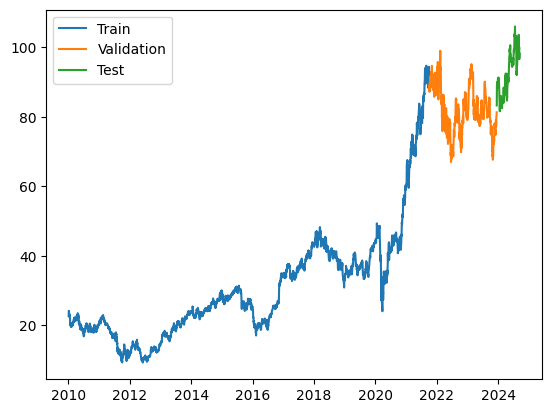

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .95)
print(X)
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
import keras
from keras import Sequential
from keras import layers

model = Sequential([layers.Input((time_path, 1)),
                    layers.LSTM(64,return_sequences=True),
                    layers.LSTM(32),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1021.4966 - mean_absolute_error: 26.9123 - val_loss: 2594.8430 - val_mean_absolute_error: 50.4964
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 273.0744 - mean_absolute_error: 12.4528 - val_loss: 2588.0417 - val_mean_absolute_error: 50.4323
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 95.7026 - mean_absolute_error: 4.0790 - val_loss: 160.0515 - val_mean_absolute_error: 10.9734
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2312 - mean_absolute_error: 1.0318 - val_loss: 31.5630 - val_mean_absolute_error: 4.7132
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8172 - mean_absolute_error: 0.8172 - val_loss: 11.2786 - val_mean_absolute_error: 2.7125
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9603 - mean_absolute_error: 0.6376 - val_loss: 12.3246 - val_mean_absolute_error: 2.8019
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8820 - mean_absolute

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
0.55727273


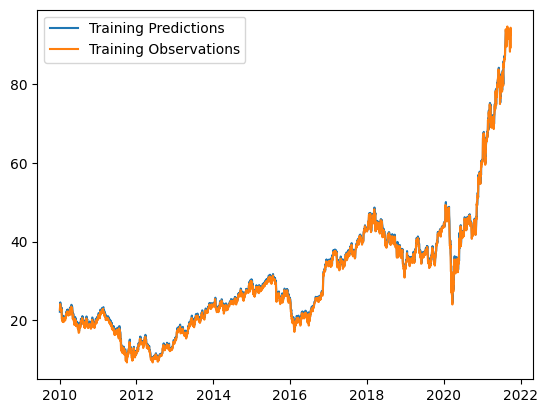

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
print(mean_absolute_error(y_train , train_predictions))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1.2338867


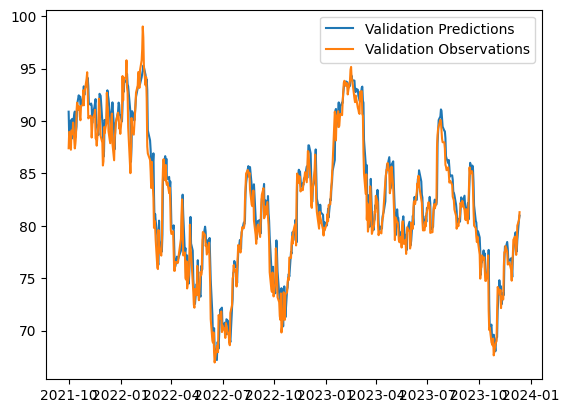

In [15]:


val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
print(mean_absolute_error(y_val , val_predictions))   #Doit être le plus faible possible 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[[101.89]
  [102.33]
  [102.08]
  [102.2 ]
  [102.6 ]
  [103.61]
  [ 99.27]
  [100.15]
  [ 99.56]
  [ 96.59]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[[101.89   ]
  [102.33   ]
  [102.08   ]
  [102.2    ]
  [102.6    ]
  [103.61   ]
  [ 99.27   ]
  [100.15   ]
  [ 99.56   ]
  [ 96.59   ]]

 [[102.33   ]
  [102.08   ]
  [102.2    ]
  [102.6    ]
  [103.61   ]
  [ 99.27   ]
  [100.15   ]
  [ 99.56   ]
  [ 96.59   ]
  [ 95.74634]]]
[[[101.89   ]
  [102.33   ]
  [102.08   ]
  [102.2    ]
  [102.6    ]
  [103.61   ]
  [ 99.27   ]
  [100.15   ]
  [ 99.56   ]
  [ 96.59   ]]

 [[102.33   ]
  [102.08   ]
  [102.2    ]
  [102.6    ]
  [103.61   ]
  [ 99.27   ]
  [100.15   ]
  [ 99.56   ]
  [ 96.59   ]
  [ 95.74634]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[[101.89   ]
  [102.33   ]
  [102.08   ]
  [102.2    ]
  [102.6    ]
  [103.61   ]
  [ 99.27   ]
  [100.15   ]
  [ 99.56   ]
  [ 96.59   ]]

 [[102.33   ]
  [102.08   ]
  [102.2    ]
  [102.6    ]
  [103.6

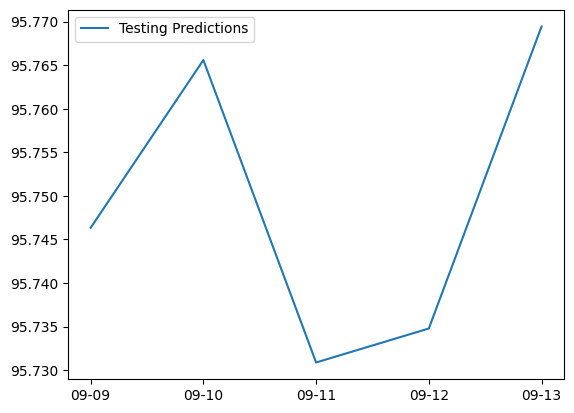

In [21]:
test_predictions = model.predict(X_test).flatten()
Number_of_days = 5
first_lst = np.array([X[-1]])

def Predict_the_future(model,X2,n,array,i) : 
    if n == 0 : 
        return array , X2
    else : 
        print(X2)
        X_2 = np.ndarray.copy(X2[i])
        X_2 = np.roll(X_2,-1)
        X_2[-1] = model.predict(np.array([X_2]))
        result = np.vstack([X2,np.array([X_2])])
        print(result)
        return Predict_the_future(model,result,n-1,np.append(array,X_2[-1]),i+1)



f_result, X2=  Predict_the_future(model,first_lst,Number_of_days,np.array([]),0)

def generate_timestamps(start_date, periods):
    # Générer une série de dates en excluant les weekends (jours ouvrés)
    dates = pd.bdate_range(start=start_date, periods=periods)  # bdate_range génère des jours ouvrés
    timestamps = [pd.Timestamp(date) for date in dates]
    return timestamps

def generate_timestamps2(start_date, periods):
    # Générer une série de dates en excluant les weekends (jours ouvrés)
    dates = pd.bdate_range(start=start_date, periods=periods)  # bdate_range génère des jours ouvrés
    timestamps = [date.strftime("%m-%d") for date in dates]  # Format MM-JJ (mois-jour)
    return timestamps

start_date = '2024-09-09'
num_dates = Number_of_days  # Number of dates you want
dates_array = generate_timestamps(start_date, num_dates)
dates_array2 = generate_timestamps2(start_date, num_dates)

print(f"The value of the action tomorrow will be {f_result[0]}")
print(f"The value of the action in 5 days will be {f_result[-1]}")
plt.plot(dates_array2 , f_result)

# plt.plot(dates_test, test_predictions)
# plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.savefig('mon_plot.png')


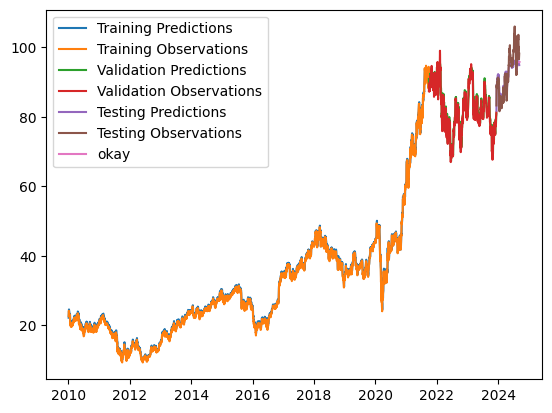

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(dates_array, f_result)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations','okay'])
plt.savefig('okay')

In [18]:
from copy import deepcopy

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.concatenate([last_window[1:], [next_prediction]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

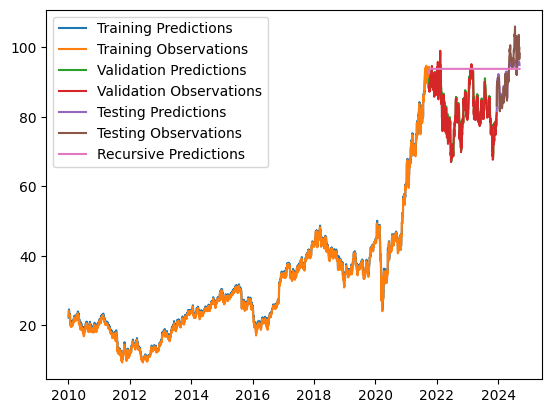

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
plt.savefig('mon_plot.png')
